In [111]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df=pd.read_csv(mouse_drug_data_to_load)
clinical_df=pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
trail_df = pd.merge(mouse_df, clinical_df, on="Mouse ID")

# Display the data table for preview
trail_df.head(50)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Tumor_Response=trail_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
Tumor_Response_df=Tumor_Response.reset_index()
Tumor_Response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Tumor_Standard=trail_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
Tumor_Standard_df=Tumor_Standard.reset_index()

# Preview DataFrame
Tumor_Standard_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [98]:
Tumor_Standard_pivot=Tumor_Standard_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
Tumor_Standard_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [88]:
# Minor Data Munging to Re-Format the Data Frames
Tumor_Response_pivot=Tumor_Response_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked
Tumor_Response_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


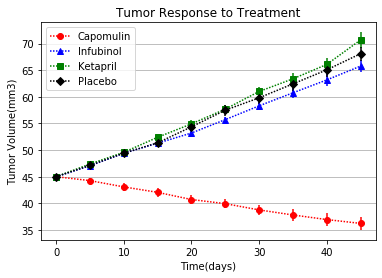

In [99]:
# Generate the Plot (with Error Bars)

Tumor_index=Tumor_Response_pivot.reset_index()
plt.errorbar(Tumor_index["Timepoint"],Tumor_index["Capomulin"],yerr=Tumor_Standard_pivot["Capomulin"], linestyle=(0,(1,1)),fmt='o',color="red",Label="Capomulin")
plt.errorbar(Tumor_index["Timepoint"],Tumor_index["Infubinol"],yerr=Tumor_Standard_pivot["Infubinol"],linestyle=(0,(1,1)),fmt="^",color="blue", Label="Infubinol")
plt.errorbar(Tumor_index["Timepoint"],Tumor_index["Ketapril"],yerr=Tumor_Standard_pivot["Ketapril"],linestyle=(0,(1,1)),fmt="s",color="green", Label="Ketapril")
plt.errorbar(Tumor_index["Timepoint"],Tumor_index["Placebo"],yerr=Tumor_Standard_pivot["Placebo"],linestyle=(0,(1,1)),fmt="D",color="black",Label="Placebo")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time(days)")
plt.ylabel("Tumor Volume(mm3)")
plt.grid(axis='y')
plt.legend()
# Save the Figure

plt.show()

In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [72]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Metastatic_Response=trail_df.groupby(["Drug","Timepoint"])["Mouse ID"].mean()

# Convert to DataFrame

Metastatic_Response_df=pd.DataFrame(Metastatic_Response)

# Preview DataFrame
Metastatic_Response_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [71]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Metastatic_Error=trail_df.groupby(["Drug","Timepoint"]).sem()
# Convert to DataFrame
Metastatic_Error=Metastatic_Error.drop(columns=['Mouse ID', 'Tumor Volume (mm3)'])
Metastatic_Error_df=pd.DataFrame(Metastatic_Error)
# Preview DataFrame
Metastatic_Error_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [73]:
# Minor Data Munging to Re-Format the Data Frames
Metastatic_Response_df=Metastatic_Response_df.reset_index()
Metastatic_Response_pivot=Metastatic_Response_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
# Preview that Reformatting worked
Metastatic_Response_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


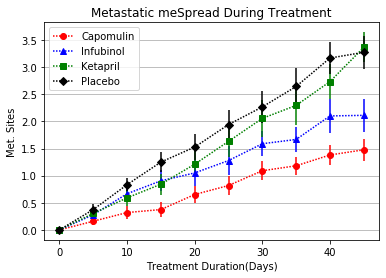

In [95]:
# Generate the Plot (with Error Bars)
Metastatic_Error_df=Metastatic_Error_df.reset_index()
Metastatic_Error_pivot=Metastatic_Error_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
Metastatic_index=Metastatic_Response_pivot.reset_index()
plt.errorbar(Metastatic_index["Timepoint"],Metastatic_index["Capomulin"],yerr=Metastatic_Error_pivot["Capomulin"],linestyle=(0,(1,1)),fmt='o',color="red",Label="Capomulin")
plt.errorbar(Metastatic_index["Timepoint"],Metastatic_index["Infubinol"],yerr=Metastatic_Error_pivot["Infubinol"],linestyle=(0,(1,1)),fmt="^",color="blue", Label="Infubinol")
plt.errorbar(Metastatic_index["Timepoint"],Metastatic_index["Ketapril"],yerr=Metastatic_Error_pivot["Ketapril"],linestyle=(0,(1,1)),fmt="s",color="green", Label="Ketapril")
plt.errorbar(Metastatic_index["Timepoint"],Metastatic_index["Placebo"],yerr=Metastatic_Error_pivot["Placebo"],linestyle=(0,(1,1)),fmt="D",color="black",Label="Placebo")

plt.title("Metastatic meSpread During Treatment")
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met. Sites")
plt.grid(axis='y')
plt.legend()
# Save the Figure

plt.show()
# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [108]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mouse=trail_df.groupby(["Drug","Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
Mouse_df=pd.DataFrame(Mouse)
# Preview DataFrame
Mouse_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [110]:
# Minor Data Munging to Re-Format the Data Frames
Mouse_df=Mouse_df.reset_index()
Mouse_pivot=Mouse_df.pivot(index="Timepoint", columns="Drug", values="Mouse ID")
# Preview the Data Frame
Mouse_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)